#Name: Syed Sameer Rizvi

#AICP Task Week 6

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

Q.1: Add a new column “Decade” by calculating. For example 1969 will be 1960, 1988 will 1980 etc.


In [12]:
df = pd.read_csv("births.csv")
df['Decade'] = (df['year'] // 10) * 10
df.to_csv("births_modified.csv", index=False)

Q.2: Show the descriptive statistics of the data.


In [13]:
df.describe()

,year,month,day,births,Decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


Q.3: Check if your data contains any missing values


In [15]:
df.dropna(inplace=True) #It contained good amount of missing values
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
Decade    0
dtype: int64

Q.4: What is the trend of male & female births every decade?

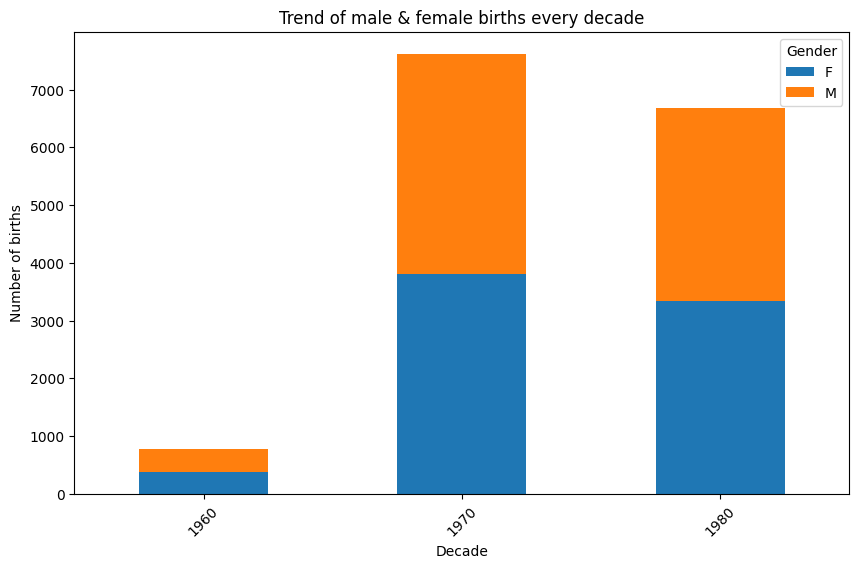

In [17]:
trend = df.groupby(['Decade', 'gender']).size().unstack()
trend.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Trend of male & female births every decade')
plt.xlabel('Decade')
plt.ylabel('Number of births')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

Q.5: To remove outliers from dataset following techinque to include only those values that fall within 5
standard deviations from the mean.This is a common statistical technique used to focus on the central
tendency of the data while excluding extreme values.
Use this technique to remove outliers.


In [20]:
zscr= (df['births'] - df['births'].mean()) / df['births'].std()
threshold = 5
df_2 = df[abs(zscr) < threshold]
df_2.to_csv("births_no_outliers.csv", index=False)

Q.6: Plot births by weekday for several decades. Write down your observation.

In [ ]:
df['date'] = df['year'].astype(str) + '-' + df['month'].astype(str) + '-' + df['day'].astype(str)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date'])
df['weekday'] = df['date'].dt.day_name()
births_by_weekday = df.groupby('weekday')['births'].sum()
births_by_weekday.plot(kind='bar', figsize=(10, 6))
plt.title('Births by weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of births')
plt.xticks(rotation=45)
plt.show()

Q.7: Group the data by month and day separately


In [29]:
df = pd.read_csv("births_modified.csv")
bbm = df.groupby('month')['births'].sum()
bbd = df.groupby('day')['births'].sum()
print("Births by Month:")
print(bbm)
print("\nBirths by Day:")
print(bbm)

Births by Month:
month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64

Births by Day:
month
1     12364197
2     11541178
3     12678844
4     12085891
5     12624972
6     12521070
7     13367556
8     13528007
9     13252831
10    12954950
11    12197967
12    12656915
Name: births, dtype: int64


Q.8: Focusing on the month and day only, you have a time series reflecting the average number of
births by date of the year. From this, plot the data.

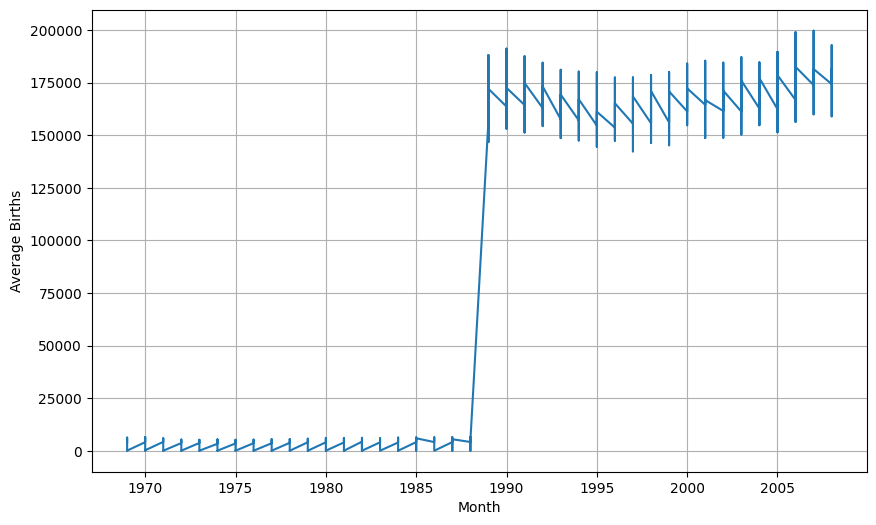

In [51]:
df = pd.read_csv('births_modified.csv', header=0, index_col=0)
births_data = df['births']
plt.figure(figsize=(10, 6))
births_data.plot(kind='line', colormap='tab20')
plt.xlabel('Month')
plt.ylabel('Average Births')
plt.grid(True)
plt.show()